In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp

In [3]:
file_path = 'Survey1.csv'

# Try reading the CSV file with different encodings
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    # If 'utf-8' encoding fails, try 'latin-1' or 'ISO-8859-1'
    df = pd.read_csv(file_path, encoding='latin-1')


In [4]:
df.head()

,ID,Gender,Age,Physical Activity (times per week),"On a scale of 1 to 5, how would you rate the impact of engaging in sports or physical activities on your overall wellness? (1 = Very low impact, 5 = Very high impact)",What type of diet do you follow?,How often do you eat processed food?,How often do you eat fruits and vegetables?,"On a scale of 1 to 5, how would you rate the impact of your nutritional choices on your overall wellness?",What are your primary wellness goals? (Select all that apply),How do you stay informed about wellness-related topics? (Select all that apply),What are the primary challenges you face in maintaining a healthy lifestyle? (Select all that apply)
0,1,Male,25-34,4-5 per week,5,Omnivore,1-2 per week,3-4 per week,4,Improve mental health;Improve body composition;,Social Media;,Lack of time for meal preparation;Limited time...
1,2,Female,25-34,2-3 per week,4,Omnivore,Everyday,Everyday,4,Improve mental health;Improve body composition;,Social Media;,Lack of time for meal preparation;Busy work sc...
2,3,Female,25-34,2-3 per week,5,Omnivore,1-2 per week,Everyday,4,Improve mental health;Increase energy levels;,Social Media;,Busy work schedule;Lack of time for meal prepa...
3,4,Male,25-34,0-1 per week,5,Omnivore,1-2 per week,Everyday,5,Weight management;Improve body composition;Inc...,Social Media; Fitness professionals or trainers;,Busy work schedule;Limited time for regular ex...
4,5,Male,25-34,4-5 per week,5,Omnivore,1-2 per week,Everyday,5,Improve mental health;Weight management;Improv...,Social Media;,Limited time for regular exercise;Busy work sc...


In [5]:
df.columns

Index(['ID', 'Gender', 'Age', 'Physical Activity (times per week)',
       'On a scale of 1 to 5, how would you rate the impact of engaging in sports or physical activities on your overall wellness? (1 = Very low impact, 5 = Very high impact)',
       'What type of diet do you follow? ',
       'How often do you eat processed food?',
       'How often do you eat fruits and vegetables?',
       'On a scale of 1 to 5, how would you rate the impact of your nutritional choices on your overall wellness?',
       'What are your primary wellness goals? (Select all that apply)',
       'How do you stay informed about wellness-related topics? (Select all that apply)',
       'What are the primary challenges you face in maintaining a healthy lifestyle? (Select all that apply)'],
      dtype='object')

In [6]:
#Re-naming the columns to make them more easy to handle
new_columns = ['ID','Gender', 'Age','Physical Activity', 'Impact of sports in wellness','Diet', 'Processed food frequency', 'Fruits and Vegetables frequency','Impact of nutrition in wellness','Primary wellness goals','How do you stay informed?','Main Challenges']

In [7]:
df.columns = new_columns

In [8]:
df.head()

,ID,Gender,Age,Physical Activity,Impact of sports in wellness,Diet,Processed food frequency,Fruits and Vegetables frequency,Impact of nutrition in wellness,Primary wellness goals,How do you stay informed?,Main Challenges
0,1,Male,25-34,4-5 per week,5,Omnivore,1-2 per week,3-4 per week,4,Improve mental health;Improve body composition;,Social Media;,Lack of time for meal preparation;Limited time...
1,2,Female,25-34,2-3 per week,4,Omnivore,Everyday,Everyday,4,Improve mental health;Improve body composition;,Social Media;,Lack of time for meal preparation;Busy work sc...
2,3,Female,25-34,2-3 per week,5,Omnivore,1-2 per week,Everyday,4,Improve mental health;Increase energy levels;,Social Media;,Busy work schedule;Lack of time for meal prepa...
3,4,Male,25-34,0-1 per week,5,Omnivore,1-2 per week,Everyday,5,Weight management;Improve body composition;Inc...,Social Media; Fitness professionals or trainers;,Busy work schedule;Limited time for regular ex...
4,5,Male,25-34,4-5 per week,5,Omnivore,1-2 per week,Everyday,5,Improve mental health;Weight management;Improv...,Social Media;,Limited time for regular exercise;Busy work sc...


In [9]:
# Count the occurrences of each unique value in the 'Age' column
age_counts = df['Age'].value_counts()

# Calculate the percentage of each unique value in the 'Age' column out of the total count
age_percentage = age_counts / age_counts.sum() * 100


In [10]:
age_percentage

25-34    69.953052
35-44    13.615023
18-24    12.676056
45-54     1.877934
55+       1.877934
Name: Age, dtype: float64

In [11]:
gender_counts = df['Gender'].value_counts()

# Calculate the percentage of each unique value in the 'Age' column out of the total count
gender_percentage = gender_counts / gender_counts.sum() * 100

gender_percentage

Female        57.276995
Male          42.253521
Non-binary     0.469484
Name: Gender, dtype: float64

In [12]:
# Count the occurrences of each unique value in the 'Physical Activity' column
physical_activity_counts = df['Physical Activity'].value_counts()

# Calculate the percentage of each unique value in the 'Physical Activity' column out of the total count
percentage_physical_activity = physical_activity_counts / physical_activity_counts.sum() * 100


In [13]:
percentage_physical_activity

2-3 per week    39.906103
0-1 per week    27.699531
4-5 per week    24.413146
5+               7.981221
Name: Physical Activity, dtype: float64

In [14]:
# Count the occurrences of each unique value in the 'Physical Activity' column by gender
activity_by_gender = df.groupby('Gender')['Physical Activity'].value_counts().unstack()

# Calculate the percentage of each unique value in the 'Physical Activity' column out of the total count for each gender
percentage_activity_by_gender = activity_by_gender.div(activity_by_gender.sum(axis=1), axis=0) * 100

# Display the result
print(percentage_activity_by_gender)


Physical Activity  0-1 per week  2-3 per week  4-5 per week          5+
Gender                                                                 
Female                32.786885     46.721311     17.213115    3.278689
Male                  21.111111     31.111111     34.444444   13.333333
Non-binary                  NaN           NaN           NaN  100.000000


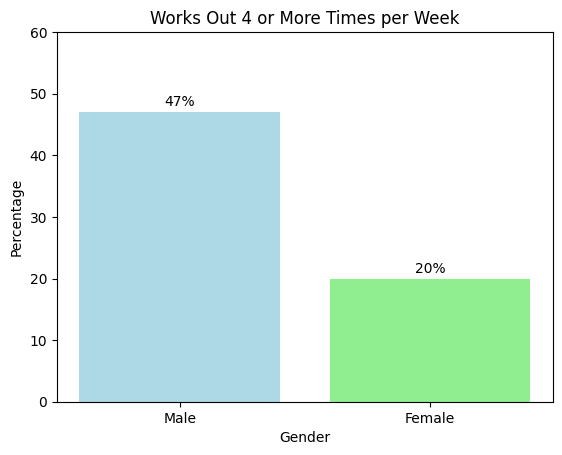

In [15]:
import matplotlib.pyplot as plt


# Sample data
percentage_by_gender = {'Male': 47, 'Female': 20}

# Extracting data for plotting
genders = list(percentage_by_gender.keys())
percentages = list(percentage_by_gender.values())

# Creating a bar chart
plt.bar(genders, percentages, color=['lightblue', 'lightgreen'])

# Setting y-axis limits to 0% to 80%
plt.ylim(0, 60)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Works Out 4 or More Times per Week')

# Adding percentage labels on top of the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage}%', ha='center')

# Show the plot
plt.show()


In [16]:
#Almost 50% of men, work out at least 4 or more times per week, while only 20% on women workout 4 or more times per week

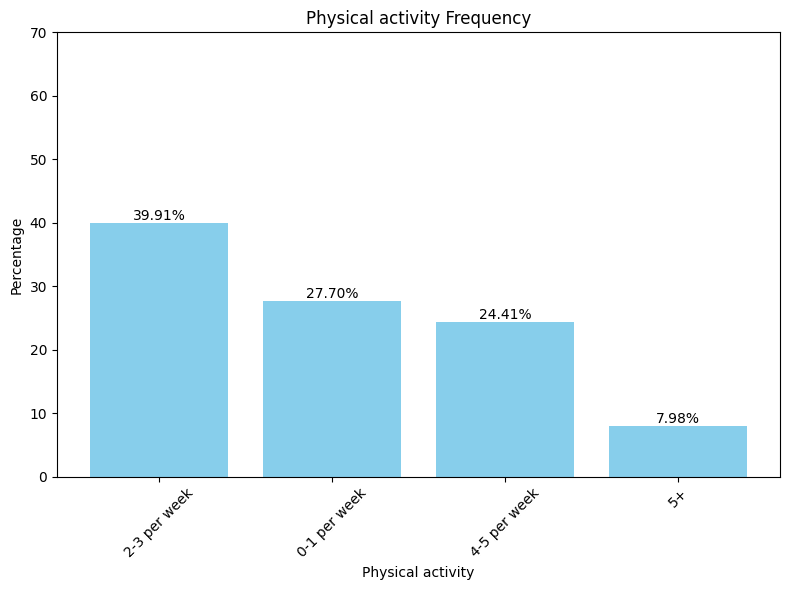

In [17]:
# Sample data (replace with your actual data)
categories = percentage_physical_activity.index.tolist()
percentages = percentage_physical_activity.values.tolist()

# Create the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, percentages, color='skyblue')

# Add labels and title
plt.xlabel('Physical activity')
plt.ylabel('Percentage')
plt.title('Physical activity Frequency')

# Add percentage labels to each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.ylim(0, 70)
plt.show()

In [18]:
df['Impact of sports in wellness'].mean()

4.056338028169014

In [19]:
df['Impact of nutrition in wellness'].mean()

4.098591549295775

In [20]:
# Set the threshold for high impact


threshold = 3.5

# Perform one-sample t-test for 'Impact of sports in wellness'
t_stat_sports, p_value_sports = ttest_1samp(df['Impact of sports in wellness'], threshold, alternative='greater')

# Perform one-sample t-test for 'Impact of nutrition in wellness'
t_stat_nutrition, p_value_nutrition = ttest_1samp(df['Impact of nutrition in wellness'], threshold, alternative='greater')

# Display the results
print(f"Results for 'Impact of sports in wellness':")
print(f"T-statistic: {t_stat_sports}")
print(f"P-value: {p_value_sports}")
print(f"{'Reject' if p_value_sports < 0.05 else 'Fail to reject'} the null hypothesis")

print("\nResults for 'Impact of nutrition in wellness':")
print(f"T-statistic: {t_stat_nutrition}")
print(f"P-value: {p_value_nutrition}")
print(f"{'Reject' if p_value_nutrition < 0.05 else 'Fail to reject'} the null hypothesis")

Results for 'Impact of sports in wellness':
T-statistic: 8.546962864371588
P-value: 1.2504113417484375e-15
Reject the null hypothesis

Results for 'Impact of nutrition in wellness':
T-statistic: 10.42312232968982
P-value: 4.1867801722044816e-21
Reject the null hypothesis


In [21]:
# Count the occurrences of each unique value in the 'Fruits and Vegetables frequency' column
fruits_vegetables_counts = df['Fruits and Vegetables frequency'].value_counts()

# Calculate the percentage of each unique value in the 'Fruits and Vegetables frequency' column out of the total count
fruits_vegetables_percentage = fruits_vegetables_counts / fruits_vegetables_counts.sum() * 100


In [22]:
fruits_vegetables_percentage

Everyday        64.788732
3-4 per week    24.413146
1-2 per week     9.389671
Never            1.408451
Name: Fruits and Vegetables frequency, dtype: float64

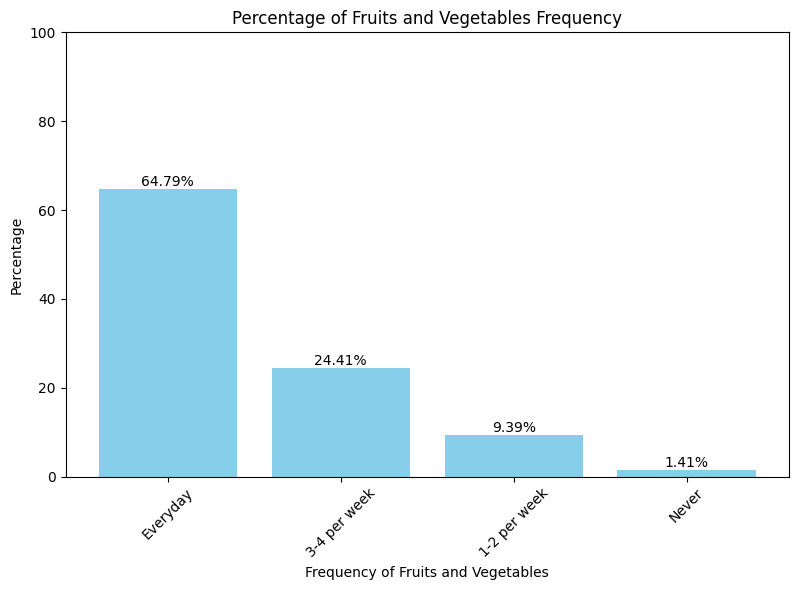

In [23]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
categories = fruits_vegetables_percentage.index.tolist()
percentages = fruits_vegetables_percentage.values.tolist()

# Create the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, percentages, color='skyblue')

# Add labels and title
plt.xlabel('Frequency of Fruits and Vegetables')
plt.ylabel('Percentage')
plt.title('Percentage of Fruits and Vegetables Frequency')

# Add percentage labels to each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.ylim(0, 100)
plt.show()



In [24]:
# Count the occurrences of each unique value in the 'Physical Activity' column by gender
healthy_food_by_gender = df.groupby('Gender')['Fruits and Vegetables frequency'].value_counts().unstack()

# Calculate the percentage of each unique value in the 'Physical Activity' column out of the total count for each gender
percentage_healthy_food_by_gender = healthy_food_by_gender.div(healthy_food_by_gender.sum(axis=1), axis=0) * 100

# Display the result
print(percentage_healthy_food_by_gender)

Fruits and Vegetables frequency  1-2 per week  3-4 per week    Everyday  \
Gender                                                                    
Female                               4.098361     21.311475   73.770492   
Male                                16.666667     28.888889   52.222222   
Non-binary                                NaN           NaN  100.000000   

Fruits and Vegetables frequency     Never  
Gender                                     
Female                           0.819672  
Male                             2.222222  
Non-binary                            NaN  


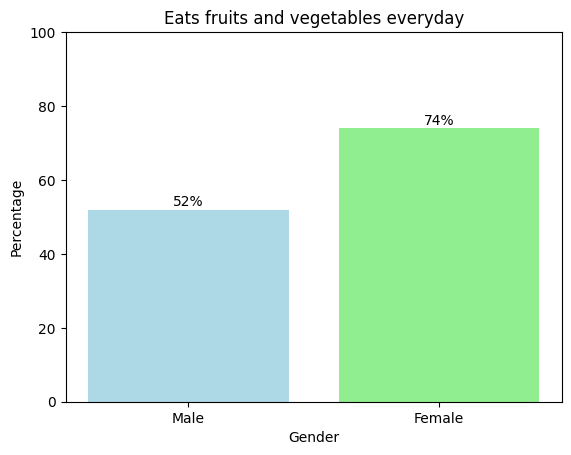

In [25]:
percentage_by_gender = {'Male': 52, 'Female': 74}

# Extracting data for plotting
genders = list(percentage_by_gender.keys())
percentages = list(percentage_by_gender.values())

# Creating a bar chart
plt.bar(genders, percentages, color=['lightblue', 'lightgreen'])

# Setting y-axis limits to 0% to 80%
plt.ylim(0, 100)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Eats fruits and vegetables everyday')

# Adding percentage labels on top of the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage}%', ha='center')

# Show the plot
plt.show()

In [26]:
# Count the occurrences of each unique value in the 'Processed food frequency' column
Processed_food_frequency_counts = df['Processed food frequency'].value_counts()

# Calculate the percentage of each unique value in the 'Processed food frequency' column out of the total count
Processed_food_frequency_percentage = Processed_food_frequency_counts / Processed_food_frequency_counts.sum() * 100


In [27]:
Processed_food_frequency_percentage

1-2 per week    57.276995
3-4 per week    27.699531
Everyday        10.328638
Never            4.694836
Name: Processed food frequency, dtype: float64

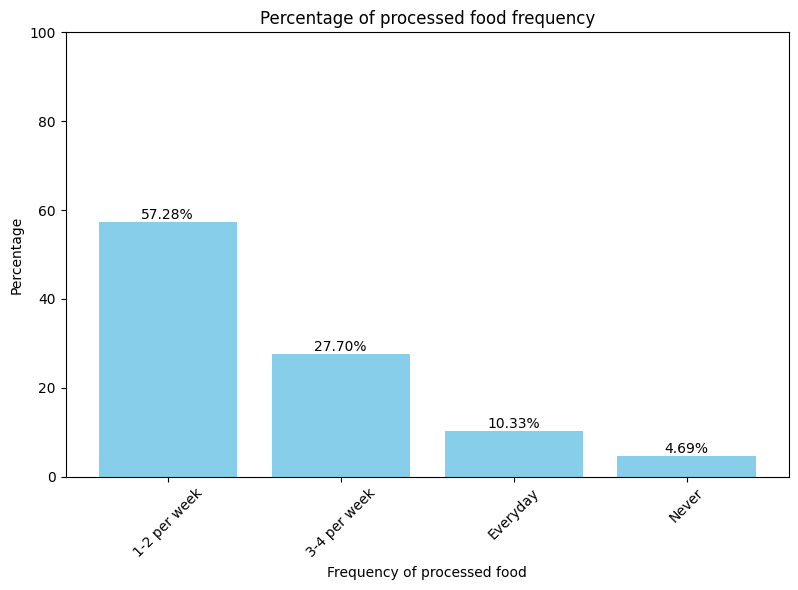

In [28]:
# Sample data (replace with your actual data)
categories = Processed_food_frequency_percentage.index.tolist()
percentages = Processed_food_frequency_percentage.values.tolist()

# Create the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, percentages, color='skyblue')

# Add labels and title
plt.xlabel('Frequency of processed food')
plt.ylabel('Percentage')
plt.title('Percentage of processed food frequency')

# Add percentage labels to each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.ylim(0, 100)
plt.show()

In [29]:
junk_food_by_gender = df.groupby('Gender')['Processed food frequency'].value_counts().unstack()

# Calculate the percentage of each unique value in the 'Physical Activity' column out of the total count for each gender
percentage_junk_food_by_gender = junk_food_by_gender.div(junk_food_by_gender.sum(axis=1), axis=0) * 100

# Display the result
print(percentage_junk_food_by_gender)

Processed food frequency  1-2 per week  3-4 per week   Everyday       Never
Gender                                                                     
Female                       63.934426     22.950820   9.016393    4.098361
Male                         48.888889     34.444444  12.222222    4.444444
Non-binary                         NaN           NaN        NaN  100.000000


In [30]:
# Remove trailing semicolon from each element in the 'Primary wellness goals' column
df['Primary wellness goals'] = df['Primary wellness goals'].astype(str).str.rstrip(';')


# Create a new DataFrame to store the separated values from 'Primary wellness goals' column
# The 'stack' function is used to reshape the DataFrame, making it suitable for counting
split_df = df['Primary wellness goals'].str.split(';', expand=True).stack()

# Count the occurrences of each aspect after splitting
aspect_counts = split_df.value_counts()

# Calculate the percentage of the total for each aspect
percentage_of_total = aspect_counts / aspect_counts.sum() * 100

# Display the result - percentage of each aspect out of the total
print(percentage_of_total)


Improve mental health                                 30.451128
Improve body composition                              23.496241
Increase energy levels                                22.744361
Weight management                                     20.488722
Not negatively impact my health                        0.187970
Compensate with workouts                               0.187970
Longevity                                              0.187970
Fun                                                    0.187970
General health                                         0.187970
Staying balanced and fit in general                    0.187970
Get stronger                                           0.187970
Be as biologically close to a gorilla as possible      0.187970
Eat clean and respectfully (with me and animals)       0.187970
Memory wellness                                        0.187970
Keep healthy and stay away from illnesses              0.187970
Address medical issues                  

In [31]:
# Remove trailing semicolon from each element in the 'How do you stay informed?' column
df['How do you stay informed?'] = df['How do you stay informed?'].astype(str).str.rstrip(';')

# Create a new DataFrame to store the separated values from 'How do you stay informed?' column
# The 'stack' function is used to reshape the DataFrame, making it suitable for counting
split_df = df['How do you stay informed?'].str.split(';', expand=True).stack()

# Count the occurrences of each aspect after splitting
aspect_counts = split_df.value_counts()

# Calculate the percentage of the total for each aspect
percentage_of_total = aspect_counts / aspect_counts.sum() * 100

# Display the result - percentage of each aspect out of the total
print(percentage_of_total)


Social Media                                              48.059701
 Fitness professionals or trainers                        20.895522
Books and literature                                      14.029851
Health and wellness apps                                  10.746269
None                                                       0.895522
Friends and family                                         0.597015
I don't                                                    0.597015
Doctors                                                    0.298507
Holistic medical professionals                             0.298507
Conversations with friends                                 0.298507
Word of mouth                                              0.298507
Radio and TV documentaries                                 0.298507
Do not                                                     0.298507
Googling and reading articles                              0.298507
Dedicated websites                              

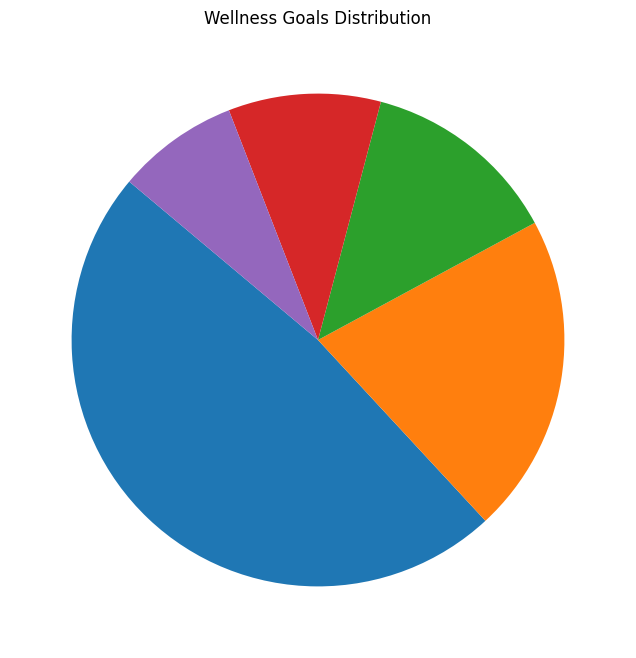

In [32]:
import matplotlib.pyplot as plt

# Data
labels = ['Social Media', 'Fitness professionals or trainers', 'Books and literature ', 'Health and wellness apps', 'Others']
values = [48, 21, 13, 10,8]

# Combine values less than 5% into 'Others'

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=None, startangle=140)
plt.title('Wellness Goals Distribution')
plt.show()
